# Compute the spectral image over all 3 datasets

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Define utility functions

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import shutil
import os
import zipfile
import gc
from PIL import Image

# Function to generate all log spectrogram of the wav files inside a directory
def process_folder(input_path, output_path):
  """
  Process all files in subfolders of the input path, generating and saving spectrogram images.

  Args:
      input_path (str): Path to the input directory.
      output_path (str): Path to the output directory for saving spectrogram images.
  """
  for root, dirs, files in os.walk(input_path):
    for fil in files:
      if fil.endswith('.wav'):
        print('Processing file : ' + fil)
        file_path = os.path.join(root, fil)
        relative_path = os.path.relpath(file_path, input_path)
        output_image_path = os.path.join(output_path, os.path.splitext(relative_path)[0] + '.jpg')
        os.makedirs(os.path.dirname(output_image_path), exist_ok=True)
        wav_to_log_spectrogram(file_path, output_image_path)

        del file_path
        del relative_path
        del output_image_path
        gc.collect()

# Function to convert a wav file into is log spectrogram
def wav_to_log_spectrogram(wav_file, output_image_path, sr=22050, n_fft=2048, hop_length=512):
  """
  Converts a WAV file into a logarithmic spectrogram image.

  Args:
      wav_file (str): Path to the input WAV file.
      output_image_path (str): Path to save the output spectrogram image.
      sr (int): Sampling rate.
      n_fft (int): Number of samples for each short-time Fourier transform (STFT).
      hop_length (int): Number of samples between successive STFT frames.
  """

  # Load the WAV file
  y, sr = librosa.load(wav_file, sr=sr)

  # Compute the Short-Time Fourier Transform (STFT)
  D = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))

  # Convert amplitude to decibels (dB)
  DB = librosa.amplitude_to_db(D, ref=np.max)

  # Plot the spectrogram with logarithmic frequency scaling
  plt.figure(figsize=(10, 6), num=1, clear=True)
  librosa.display.specshow(DB, sr=sr)
  plt.tight_layout()

  # Save the spectrogram image
  plt.savefig(output_image_path)

  del y
  del sr
  del D
  del DB
  gc.collect()


# Utility function to create zip folders
def zip_folder(folder_path, output_zip_path):
  """Zips the contents of a folder into a zip file.

  Args:
      folder_path: The path to the folder to be zipped.
      output_zip_path: The path to the output zip file.
  """
  print('Zipping ' + folder_path + ' into ' + output_zip_path)
  output_dir = os.path.dirname(output_zip_path)
  if not os.path.exists(output_dir):
      os.makedirs(output_dir)

  with zipfile.ZipFile(output_zip_path, "w", zipfile.ZIP_DEFLATED) as zip_file:
    for root, dirs, files in os.walk(folder_path):
      for file in files:
        file_path = os.path.join(root, file)
        zip_file.write(file_path)


# Utility function to delete directories
def delete_directory(directory):
  """Deletes a directory and all its contents.

  Args:
      directory (str): The path to the directory to be deleted.
  """
  print('Deleting directory ' + directory)
  try:
    shutil.rmtree(directory)
    print(f"Directory '{directory}' and all its contents have been successfully deleted.")
  except Exception as e:
    print(f"An error occurred while deleting the directory '{directory}': {e}")


# Utilitu function to move subfolders to parent folder
def move_subfolders_to_parent(folder_path):
  # Iterate through subdirectories of folder2
  for root, dirs, files in os.walk(folder_path):
    for subdir in dirs:
      subdir_path = os.path.join(root, subdir)
      # Move each subdirectory to folder1
      shutil.move(subdir_path, os.path.dirname(folder_path))

## Process datasets

Streaming output truncated to the last 5000 lines.
Processing file : 3-didar-9.wav
Processing file : 7-the_sea_as_a_moon-launched_mirror-42.wav
Processing file : 7-sehtar_dastan-6.wav
Processing file : 16-what_wonderful_news-19.wav
Processing file : 17-music_of_waters-20.wav
Processing file : 2-taking_flight-46.wav
Processing file : 3-the_fire_circle-3.wav
Processing file : 2-river-25.wav
Processing file : 9-innerlude-19.wav
Processing file : 1-ragasutra-17.wav
Processing file : 2-birds_of_mindrise-16.wav
Processing file : 6-intuitive_plane-2.wav
Processing file : 2-birds_of_mindrise-6.wav
Processing file : 1-raga_hansa_kalyani-42.wav
Processing file : 2-taking_flight-2.wav
Processing file : 16-john_barleycorn-0.wav
Processing file : 6-life_glides-34.wav
Processing file : 2-raga_malgunji_-_jor-73.wav
Processing file : 3-the_fire_circle-17.wav
Processing file : 4-beledi_2_4_4-1.wav
Processing file : 1-raga_hansa_kalyani-15.wav
Processing file : 1-sweet_dissonance-10.wav
Processing file 

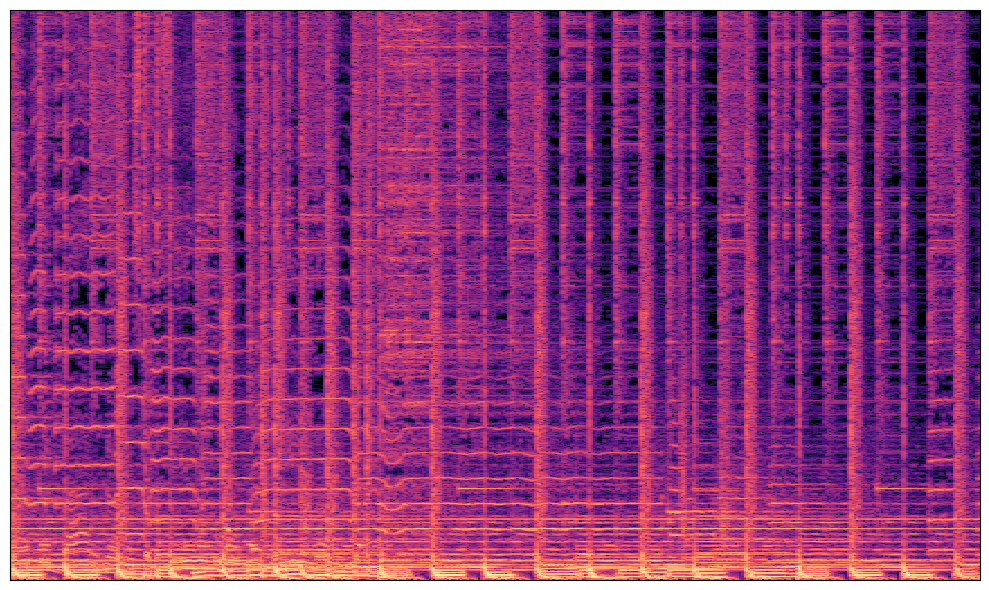

In [ ]:
# from utilities import process_folder, move_subfolders_to_parent, zip_folder, delete_directory

# datasets = ['gtzan', 'homburg', 'ismir2004']
datasets = ['ismir2004']
datasets_drive_path = '/content/drive/MyDrive/Università/NAML_project/datasets_processed/'

for dataset in datasets:
  # upload and unzip the dataset from google drive
  dataset_folder = datasets_drive_path + dataset + '.zip'
  !unzip "$dataset_folder"

  input_path = '/content/' + dataset
  output_path = '/content/' + dataset + '_spectrum'

  move_subfolders_to_parent('/content/content')

  # generate spectrums
  process_folder(input_path, output_path)

  drive_zip_output_path = datasets_drive_path + dataset + '_spectrum.zip'

  # zip the new spectrum folder and save it to drive
  zip_folder(output_path, drive_zip_output_path)

  # delete the directories created during the process to avoid filling colab disk space
  delete_directory(output_path)
  delete_directory(input_path)

In [ ]:
delete_directory("/content/content")
delete_directory("/content/gtzan")
delete_directory("/content/gtzan_spectrum")

Deleting directory /content/content
Directory '/content/content' and all its contents have been successfully deleted.
Deleting directory /content/gtzan
Directory '/content/gtzan' and all its contents have been successfully deleted.
Deleting directory /content/gtzan_spectrum
Directory '/content/gtzan_spectrum' and all its contents have been successfully deleted.
